In [2]:
# Carga de librerias
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import glob
import os
from PIL import Image
from itertools import chain
from collections import Counter
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.layers.experimental.preprocessing import Resizing
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.preprocessing.image import DirectoryIterator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import accuracy_score
from keras import backend as K
from itertools import chain
# Definición de las variables globales
IMG_SIZE=32
NUM_CHANNELS=3
NUM_CLASSES=43



ModuleNotFoundError: No module named 'cv2'

In [3]:
# Declaración de los directorios
current_dir=os.getcwd()
dataset_dir=current_dir+"/Dataset"
dir_train=dataset_dir+"/Train"
train_data=pd.read_csv(dataset_dir+"/Train.csv")
test_data=pd.read_csv(dataset_dir+"/Test.csv")
meta_data=pd.read_csv(dataset_dir+"/Meta.csv")

x_images=test_data["Path"]
x_train_images=train_data["Path"]
x_train_labels=train_data[['ClassId']].to_numpy()
y_test=test_data[['ClassId']].values


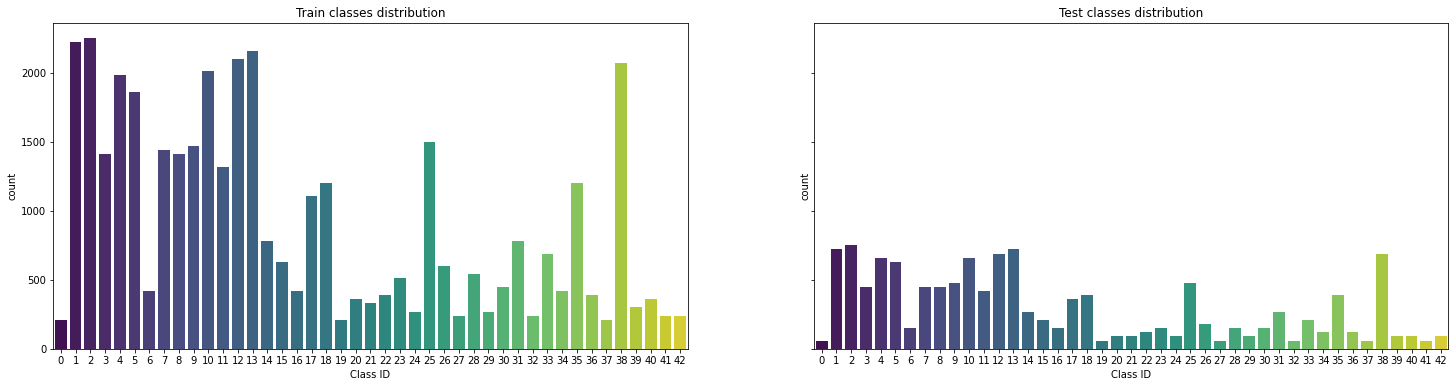

In [4]:
# Análisis de la distribución de las clases
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(25, 6))

axs[0].set_title('Train classes distribution')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')
axs[1].set_title('Test classes distribution')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Count')
sns.countplot(data=train_data, x="ClassId", ax=axs[0], palette="viridis")
sns.countplot(data=test_data, x="ClassId", ax=axs[1], palette="viridis")
axs[0].set_xlabel('Class ID');
axs[1].set_xlabel('Class ID');


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is

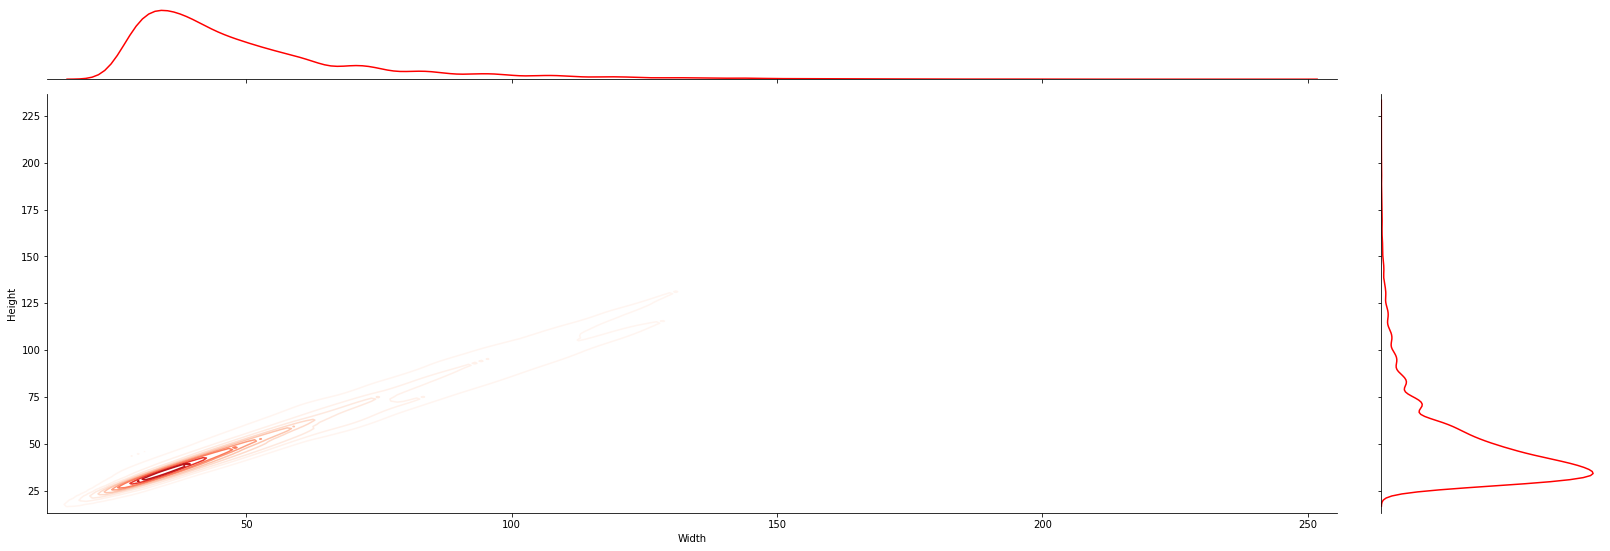

In [5]:
# Análisis de la distibución de tamaños de las imágenes

g = sns.JointGrid(x="Width", y="Height", data=train_data)
sns.kdeplot(train_data.Width, train_data.Height, cmap="Reds",
        shade=False, shade_lowest=False, ax=g.ax_joint)
sns.distplot(train_data.Width, kde=True, hist=False, color="r", ax=g.ax_marg_x, label='Train distribution')
sns.distplot(train_data.Height, kde=True, hist=False, color="r", ax=g.ax_marg_y, vertical=True)
g.fig.set_figwidth(25)
g.fig.set_figheight(8)
plt.show();


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is

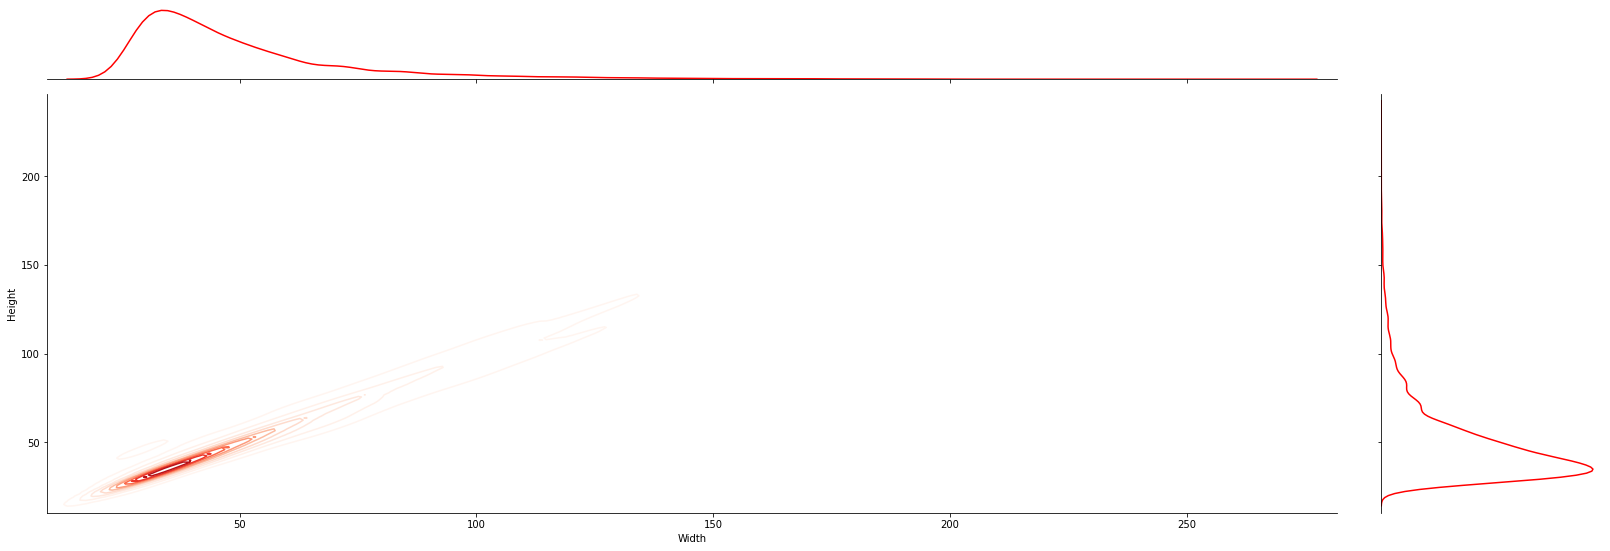

In [6]:
# Análisis de la distibución de tamaños de las imágenes
g = sns.JointGrid(x="Width", y="Height", data=test_data)
sns.kdeplot(test_data.Width, test_data.Height, cmap="Reds",
        shade=False, shade_lowest=False, ax=g.ax_joint)
sns.distplot(test_data.Width, kde=True, hist=False, color="r", ax=g.ax_marg_x, label='Train distribution')
sns.distplot(test_data.Height, kde=True, hist=False, color="r", ax=g.ax_marg_y, vertical=True)
g.fig.set_figwidth(25)
g.fig.set_figheight(8)
plt.show();

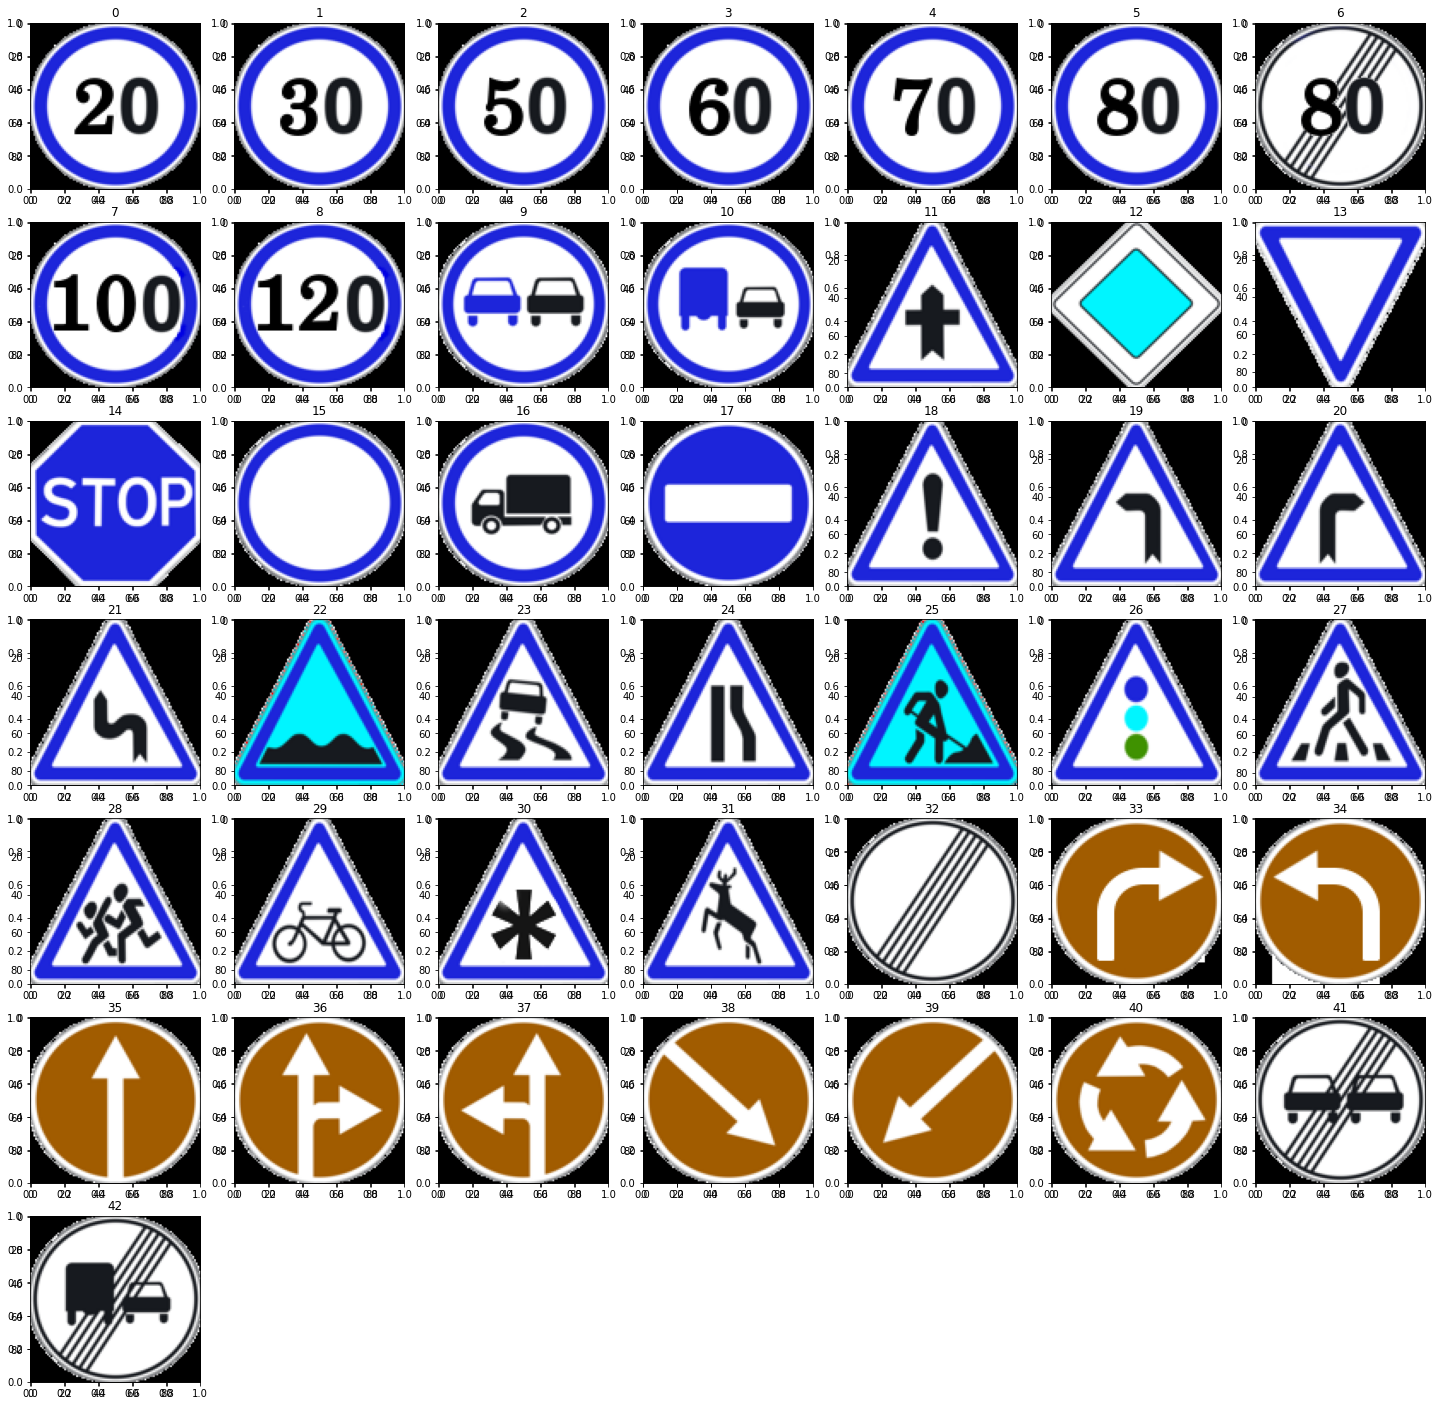

In [8]:
# Muestra de ejemplo de las distintas clases
fig, ax = plt.subplots(7, 7, figsize=(25, 25))
meta_data=meta_data.sort_values(by=["ClassId"])
map_images={}
dict_images={}
for i,img in enumerate(meta_data["Path"]):
    image=cv2.imread(str(img))
    map_images.update({i:img})
    dict_images.update({i:image})
columns = 7
rows = 7
for i in range(0, (columns*rows)):
    if i<=42:
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(dict_images[i], aspect="auto")
        # Añadimos el titulo a la imagen
        plt.title(i)
    else:
        fig.delaxes(ax[6,49-i])

plt.show()

In [9]:
# Preprocesados y generación de los datos de entrenamiento y validación
def train_images(x_train_images)
    data=[]
    labels=x_train_labels
    for i in x_train_images:
        try:
            image=cv2.imread(dataset_dir+"/"+i)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((32, 32))
            data.append(np.array(size_image))
        except AttributeError:
            print("Error")
    data = np.array(data)
    labels = np.array(labels.ravel())
    print(data.shape, labels.shape)
    shuffle_indexes = np.arange(data.shape[0])
    np.random.shuffle(shuffle_indexes)
    data = data[shuffle_indexes]
    labels = labels[shuffle_indexes]
    X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42, shuffle=True)
    X_train = X_train/255 
    X_val = X_val/255
    y_train = to_categorical(y_train, NUM_CLASSES)
    y_val = to_categorical(y_val, NUM_CLASSES)
    
    return X_train, X_val, y_train, y_val


In [13]:
# Preparación de los datos de prueba
def test_images(x_images):
    
    data=[]
    y_test=test_data[['ClassId']].values
    for i in x_images:
        try:
            image=cv2.imread(dataset_dir+"/"+i)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((IMG_SIZE, IMG_SIZE))
            data.append(np.array(size_image))
        except AttributeError:
            print("Error")
    X_test=np.array(data)
    X_test=X_test.astype('float32')/255
    return X_test, y_test

In [14]:
# Función que crea un modelo convolucional
def base_model (convs,dens, drop_conv,drop_dens):
    model=Sequential()
    for i, c in enumerate(convs):
        if i==0:
            model.add(Conv2D(filters=c, kernel_size=(5,5), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,NUM_CHANNELS)))
        else:
            model.add(Conv2D(filters=c, kernel_size=(3, 3), activation='relu'))
            model.add(MaxPool2D(pool_size=(2, 2)))
            model.add(Dropout(rate=drop_conv))
    model.add(Flatten())
    for i,d in enumerate(dens):
        model.add(Dense(d,activation="relu"))
        model.add(Dropout(rate=drop_dens))
    model.add(Dense(NUM_CLASSES,activation='softmax'))
    
    return model

In [1]:
# Generación de combinaciones de las capas convolucionales
def generate_conv_combinations(conv_list):
    combinations=[]
    for i in range(len(conv_list)):
        if i==0:
            for j in conv_list:
                combinations.append([j])
        if i==1:
            for j in conv_list:
                for z in conv_list:
                    if j<=z:
                        combinations.append([j,z])
                    else:
                        None
        if i==2:
            for j in conv_list:
                for z in conv_list:
                    for g in conv_list:
                        if j<=z and j<=g and z<=g:
                              combinations.append([j,z,g])
                        else:
                              None
    return combinations

# Generación de combinaciones de las capas densas
def generate_dens_combinations(dens_list):
    
    combinations=[]
    for i in range(len(dens_list)):
        if i==0:
            for j in dens_list:
                combinations.append([j])
        if i==1:
              for j in dens_list:
                    for z in dens_list:
                        if j>=z:
                            combinations.append([j,z])
                    else:
                        None
        if i==2:
            for j in dens_list:
                for z in dens_list:
                    for g in dens_list:
                        if j>=z and j>=g and z>=g:
                            combinations.append([j,z,g])
                        else:
                              None
    return combinations


In [16]:
# Entrenamiento delo modelo
def train_model (conv, dens, drop_conv, drop_dens,x_train_images):
    model=base_model(conv,dens,drop_conv ,drop_dens)
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
    epochs = 20
    X_train,X_val,y_train,y_val=train_images(x_train_images)
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
    model_name="C "+ str(conv) + " D"+str(dens)
    
    return model, model_name, history

In [17]:
# Predicciones del modelo
def predictions(model,name, x_images):
    result={}
    X_test,y_test=test_images(x_images)
    pred=np.argmax(model.predict(X_test), axis=-1)
    val_acc=accuracy_score(y_test,pred)
    if val_acc>=0.85:
        params=model.count_params()
        result={"Model": name,
         "Accuracy": val_acc,
         "Number of parameters": params}
    else:
        None
    return result

In [18]:
# Código principal que entrena los modelos y genera sus predicciones
conv_list=generate_conv_combinations([16,32,64])
dens_list=generate_dens_combinations([256,128])
results=[]
i=0
for conv in conv_list:
    for dens in dens_list:
        model,name,_=train_model(conv, dens, 0.25, 0.25,x_train_images)
        model.save(current_dir+'/Results/CNN_Train/cnn_'+str(i)+".h5")
        pred=predictions(model,name,x_images)
        results.append(pred)
        i=i+1
results_table=pd.DataFrame(results)
results_table.to_csv(current_dir+'/Results/CNN_Train/CNN_results.csv')
# Código principal que entrena lo models sin capas densas y genera sus predicciones
conv_list=generate_conv_combinations([16,32,64])
dens_list=[]
results=[]
for conv in conv_list:
        model,name,_=train_model(conv, [], 0.25, 0.25,x_train_images)
        model.save(current_dir+'/Results/CNN_Train/cnn_dens'+str(i)+".h5")
        pred=predictions(model,name,x_images)
        results.append(pred)
        i=i+1
results_table=pd.DataFrame(results)
results_table.to_csv(current_dir+'/Results/CNN_Train/CNN_results_dens.csv')


2021-11-25 12:00:29.157454: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-25 12:00:29.274954: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-25 12:00:29.275654: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-25 12:00:29.276847: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/20


2021-11-25 12:00:33.524357: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


981/981 [==============================] - 10s 4ms/step - loss: 0.8393 - accuracy: 0.7759 - val_loss: 0.2355 - val_accuracy: 0.9379
Epoch 2/20
981/981 [==============================] - 3s 3ms/step - loss: 0.2312 - accuracy: 0.9358 - val_loss: 0.1317 - val_accuracy: 0.9699
Epoch 3/20
981/981 [==============================] - 4s 4ms/step - loss: 0.1604 - accuracy: 0.9550 - val_loss: 0.1262 - val_accuracy: 0.9661
Epoch 4/20
981/981 [==============================] - 3s 3ms/step - loss: 0.1217 - accuracy: 0.9664 - val_loss: 0.0992 - val_accuracy: 0.9751
Epoch 5/20
981/981 [==============================] - 3s 3ms/step - loss: 0.0976 - accuracy: 0.9738 - val_loss: 0.0789 - val_accuracy: 0.9834
Epoch 6/20
981/981 [==============================] - 4s 4ms/step - loss: 0.0870 - accuracy: 0.9740 - val_loss: 0.0976 - val_accuracy: 0.9746
Epoch 7/20
981/981 [==============================] - 3s 3ms/step - loss: 0.0743 - accuracy: 0.9793 - val_loss: 0.0899 - val_accuracy: 0.9795
Epoch 8/20
981/9

,Model,Accuracy,Number of parameters
0,C [16] D[256],0.908472,3223787
1,C [16] D[128],0.927633,1612523
2,"C [16] D[256, 256]",0.919398,3289579
3,"C [16] D[256, 128]",0.920190,3251179
4,"C [16] D[128, 128]",0.916865,1629035
...,...,...,...
90,"C [64, 64, 64] D[256]",0.972605,499627
91,"C [64, 64, 64] D[128]",0.975059,289195
92,"C [64, 64, 64] D[256, 256]",0.977514,565419
93,"C [64, 64, 64] D[256, 128]",0.962391,527019
